In [1]:
# Dataset
# u.data - 100000 ratings by 943 users on 1682 items - user id | item id | rating | timestamp 
# u.item - Information about the items (movies) - movie id | movie title | release date | video release date |
        # IMDb URL | unknown | Action | Adventure | Animation |Children's | Comedy | Crime | Documentary | Drama | Fantasy |
        # Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |Thriller | War | Western |
# u.genre - A list of the genres.
# u.user  - Demographic information about the users - user id | age | gender | occupation | zip code
# u.occupation - A list of the occupations

In [48]:
import pandas as pd;
import numpy as np;

In [49]:
# Create panda data frame for u.data
user_rating_data = pd.read_csv('u.data', delim_whitespace=True, header=None)
user_rating_data.columns = ["user_id", "movie_id", "ratings", "timestamp"]
print(user_rating_data.shape)

(100000, 4)


In [50]:
np.unique(user_rating_data['ratings'])

array([1, 2, 3, 4, 5])

In [51]:
# Create panda dataframe for u.user
user_data=pd.read_csv('u.user',sep='|',header=None)
user_data.columns=['user_id','age','gender','occupation','zip_code']
print(user_data.shape)

(943, 5)


In [52]:
# Merge u.data and u.user and create a new data frame
data_user_movies=pd.merge(user_data,user_rating_data,on='user_id')
data_user_movies.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


In [53]:
# Converting categorical values to numerical
#data_user_movies['ratings']=data_user_movies['ratings'].map(lambda x: 1 if x>2 else 0)
from sklearn.preprocessing import LabelEncoder
data_user_movies=data_user_movies.apply(LabelEncoder().fit_transform)
data_user_movies.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp
0,0,14,1,19,622,60,3,8980
1,0,14,1,19,622,188,2,38632
2,0,14,1,19,622,32,3,8989
3,0,14,1,19,622,159,3,1406
4,0,14,1,19,622,19,3,35337


In [54]:
np.unique(data_user_movies['age'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

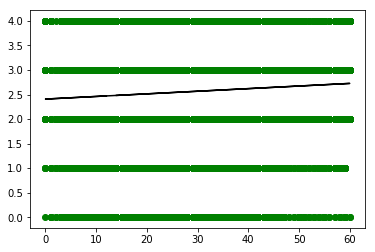

In [55]:
# Plot linerar regression to see if there is any relationship between age and ratings
from sklearn import linear_model
from matplotlib import pyplot as plt
linear_reg = linear_model.LinearRegression() 
age_data=pd.DataFrame(data_user_movies['age'])
ratings_data=data_user_movies['ratings']
ratings_data.head()
linear_reg.fit(age_data, ratings_data)
plt.scatter(age_data, ratings_data,color='g')
plt.plot(age_data, linear_reg.predict(age_data),color='k')
plt.show()

In [56]:
# DecisionTree Classification to predict rating
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder
X=data_user_movies[['age','gender','zip_code','movie_id']].values;
y=data_user_movies[['ratings']].values;
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X, y)
dtree_predictions = dtree_model.predict(X)

In [57]:
np.unique(dtree_predictions)

array([0, 2, 3, 4])

In [58]:
accuracy = dtree_model.score(X, y)
print(accuracy)

0.36103


In [59]:
# Naive bayes Classification to predict rating
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X, y.ravel())
gnb_predictions = gnb.predict(X)

In [60]:
np.unique(gnb_predictions)

array([0, 1, 2, 3])

In [16]:
# accuracy on X_test
accuracy = gnb.score(X, y)
print(accuracy)

0.34915


In [38]:
# function to bucket movie years
def movie_bucket(year):
    year=int(year);
    if (year<1970):
      return 1960;
    elif (year>1970 and year<1980):
      return 1980;
    elif (year>1980 and year<1990):
      return 1990;
    elif (year>1990 and year<2000):
      return 2000;
    elif (year>2000 and year<2010):
      return 2010;
    elif (year>2010):
      return 2020

# validating the function
str1="01-Jan-2011"
print(movie_bucket(int(str1.split('-')[2])));

2020


In [1]:
# Creating panda dataframe for u.item
movie_data=pd.read_csv('u.item',sep='|',header=None,encoding='latin-1')
#movie_data=movie_data.iloc[:,0:6]
movie_data.columns=['movie_id','movie_title','release_date','video_release_date','imdb_url','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
movie_data.dropna(subset=["release_date"],inplace= True)
movie_data['movie_decade']=movie_data['release_date'].str.split('-').str.get(2).apply(movie_bucket);
movie_data.head()

NameError: name 'pd' is not defined

In [20]:
# merge u.user, u.data, u.item and create a new data frame
data_user_movies_det=pd.merge(data_user_movies,movie_data,on='movie_id')
data_user_movies_det.head()

,user_id,age,gender,occupation,zip_code,movie_id,ratings,timestamp,movie_title,release_date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_year
0,0,14,1,19,622,60,3,8980,Three Colors: Blue (1993),01-Jan-1993,...,0,0,0,0,0,0,0,0,0,2000.0
1,12,37,1,3,243,60,3,22895,Three Colors: Blue (1993),01-Jan-1993,...,0,0,0,0,0,0,0,0,0,2000.0
2,17,25,0,13,297,60,3,17080,Three Colors: Blue (1993),01-Jan-1993,...,0,0,0,0,0,0,0,0,0,2000.0
3,57,17,1,14,389,60,4,28992,Three Colors: Blue (1993),01-Jan-1993,...,0,0,0,0,0,0,0,0,0,2000.0
4,58,39,1,3,81,60,3,37033,Three Colors: Blue (1993),01-Jan-1993,...,0,0,0,0,0,0,0,0,0,2000.0


In [21]:
data_user_movies_det.dropna(subset=['movie_year'],inplace=True)
print(data_user_movies_det[data_user_movies_det['movie_year'].isna()]['movie_year'])

Series([], Name: movie_year, dtype: float64)


In [22]:
X=data_user_movies_det[['age','gender','movie_year','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].values;
y=data_user_movies_det[['ratings']].values;

In [23]:
# running naive bayes on new data
gnb = GaussianNB().fit(X, y.ravel())
gnb_predictions = gnb.predict(X)

In [24]:
np.unique(gnb_predictions)

array([0, 1, 2, 3, 4])

In [25]:
# accuracy on X_test
accuracy = gnb.score(X, y)
print(accuracy)

0.30695689465811743


In [26]:
# Running LogisticRegression on new data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y.ravel())
lr_predictions = gnb.predict(X)

In [27]:
# accuracy
accuracy = logisticRegr.score(X, y)
print(accuracy)

0.339403575201615


In [ ]:
# function to create a new feature liked based on user rating
def like_identification(rating):
        if(rating>3):
            liked=1
        else:
            liked=0  
        return liked;    
print(like_identification(4))    

In [28]:
# Apply like_identification to new data set
data_user_movies_det['ratings']=data_user_movies['ratings'].map(lambda x: like_identification(x))
np.unique(data_user_movies_det['ratings'])

array([0, 1])

In [29]:
# Running LogisticRegression to predict binary target
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
y=data_user_movies_det[['ratings']].values;
logisticRegr.fit(X, y.ravel())
lr_predictions = gnb.predict(X)

In [30]:
# accuracy
accuracy = logisticRegr.score(X, y)
print(accuracy)

0.7882493227199984


In [31]:
# Running Naive beyes to predict binary target
gnb = GaussianNB().fit(X, y.ravel())
gnb_predictions = gnb.predict(X)

In [32]:
np.unique(gnb_predictions)

array([0, 1])

In [33]:
# accuracy on X_test
accuracy = gnb.score(X, y)
print(accuracy)

0.2735897409077121
